Functional Model Blog:
https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate

In [ ]:
# Let us make a simple model where we take in input and predict the age and gender of a person

<img src="example_1.png" height=300>

In [42]:
# First define the layers and the connections

input_layer = Input(shape=(3, ))            # input tensor with 3 columns 
                                            # its not a Layer, its a placeholder for a tensor 

hidden_1 = Dense(units=32, activation="relu")(input_layer)          # hidden layer connected to input layer
hidden_2 = Dense(units=32, activation="relu")(hidden_1)             # hidden layer connected to hidden layer 1

output_age = Dense(units=1, activation="relu")(hidden_2)            # output layer for predicting gender (connected to hidden_2)
output_gender = Dense(units=1, activation="linear")(hidden_2)       # output layer for predicting age (connected to hidden_2)

In [5]:
# Note:
# Use Input() instead of InputLayer(), yes even for Sequential Model
# Recommended by tensorflow in newer versions

In [6]:
# Creating the model

model = Model(
    inputs=input_layer,
    outputs=[output_age, output_gender]
)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      1,056 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,250 (4.88 KB)

 Trainable params: 1,250 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

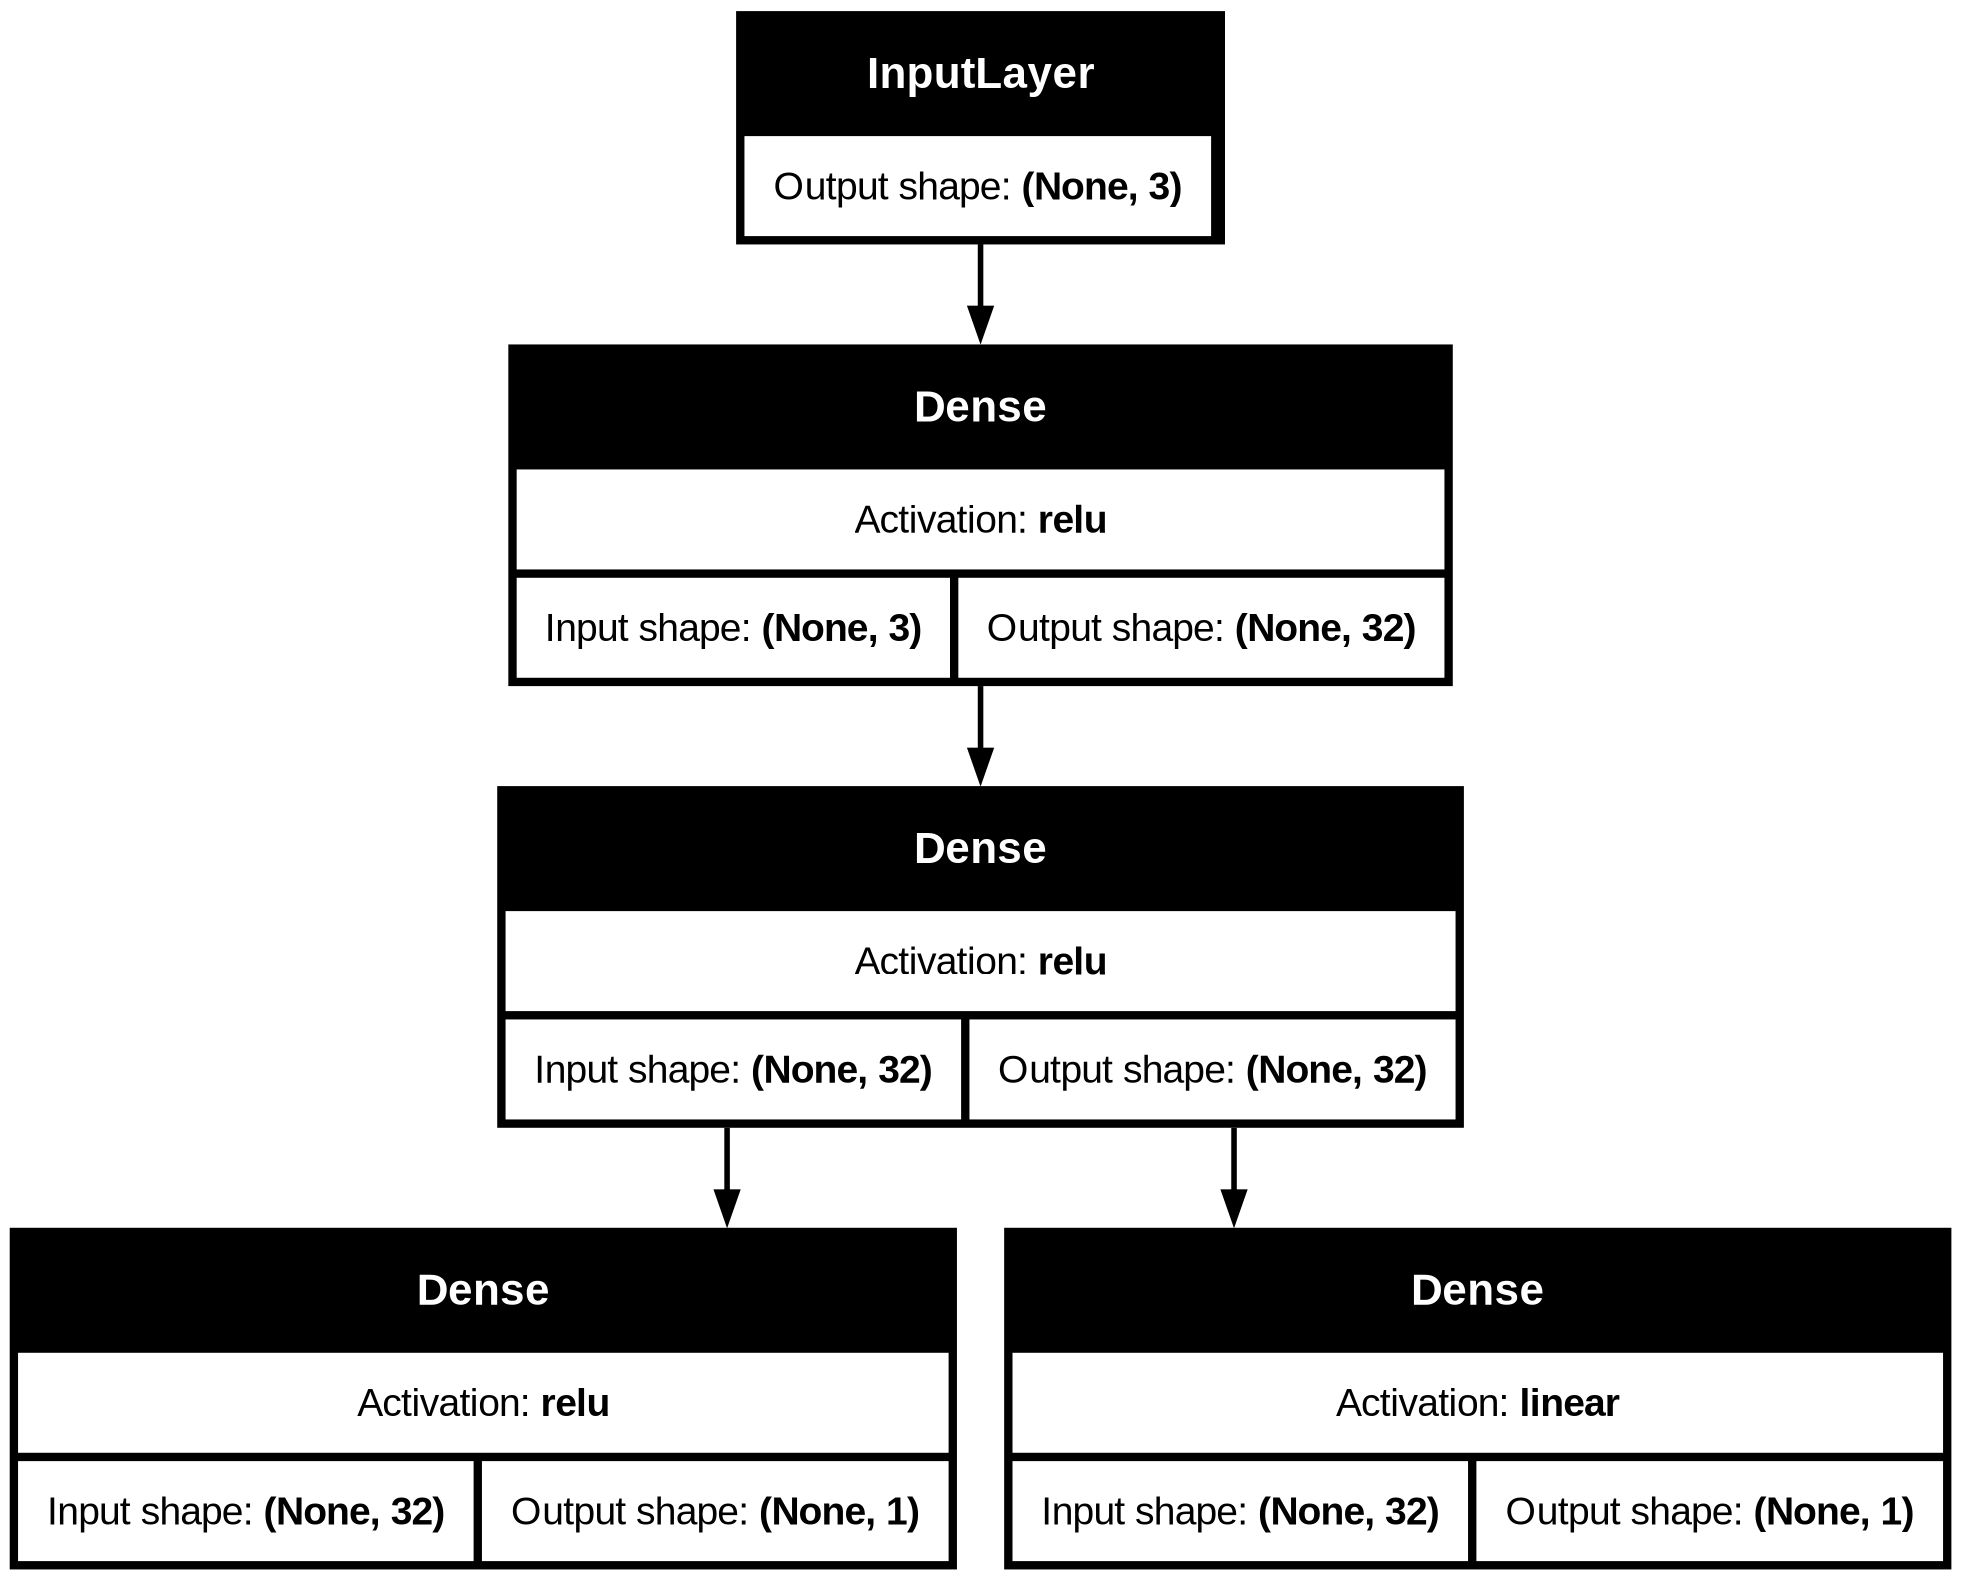

In [38]:
# Let us visualize the model

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_activations=True)

### Example 2
<img src="example_2.png" alt="Example 2" width="300">

#### Notice the concatenation operation

In [9]:
# Define layers and connections

In [11]:
# first branch
input_1 = Input((32, ))
hidden_11 = Dense(8, "relu")(input_1)
hidden_12 = Dense(4, "relu")(hidden_11)

# second branch
input_2 = Input((128, ))
hidden_21 = Dense(64, "relu")(input_2)
hidden_22 = Dense(32, "relu")(hidden_21)
hidden_23 = Dense(4, "relu")(hidden_22)

In [20]:
# concatenate the branches

combined = concatenate([hidden_12, hidden_23])

In [ ]:
# add the last layers

hidden_3 = Dense(8, "relu")(combined)

output = Dense(1, "sigmoid")(hidden_3)

In [23]:
# Make the model

model_2 = Model(
    inputs=[input_1, input_2],
    outputs=output
)

model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      8,256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 8)         │        264 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │      2,080 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 4)         │         36 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 4)         │        132 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 8)         │          0 │ dense_10[0][0],   │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 8)         │         72 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1)         │          9 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,849 (42.38 KB)

 Trainable params: 10,849 (42.38 KB)

 Non-trainable params: 0 (0.00 B)

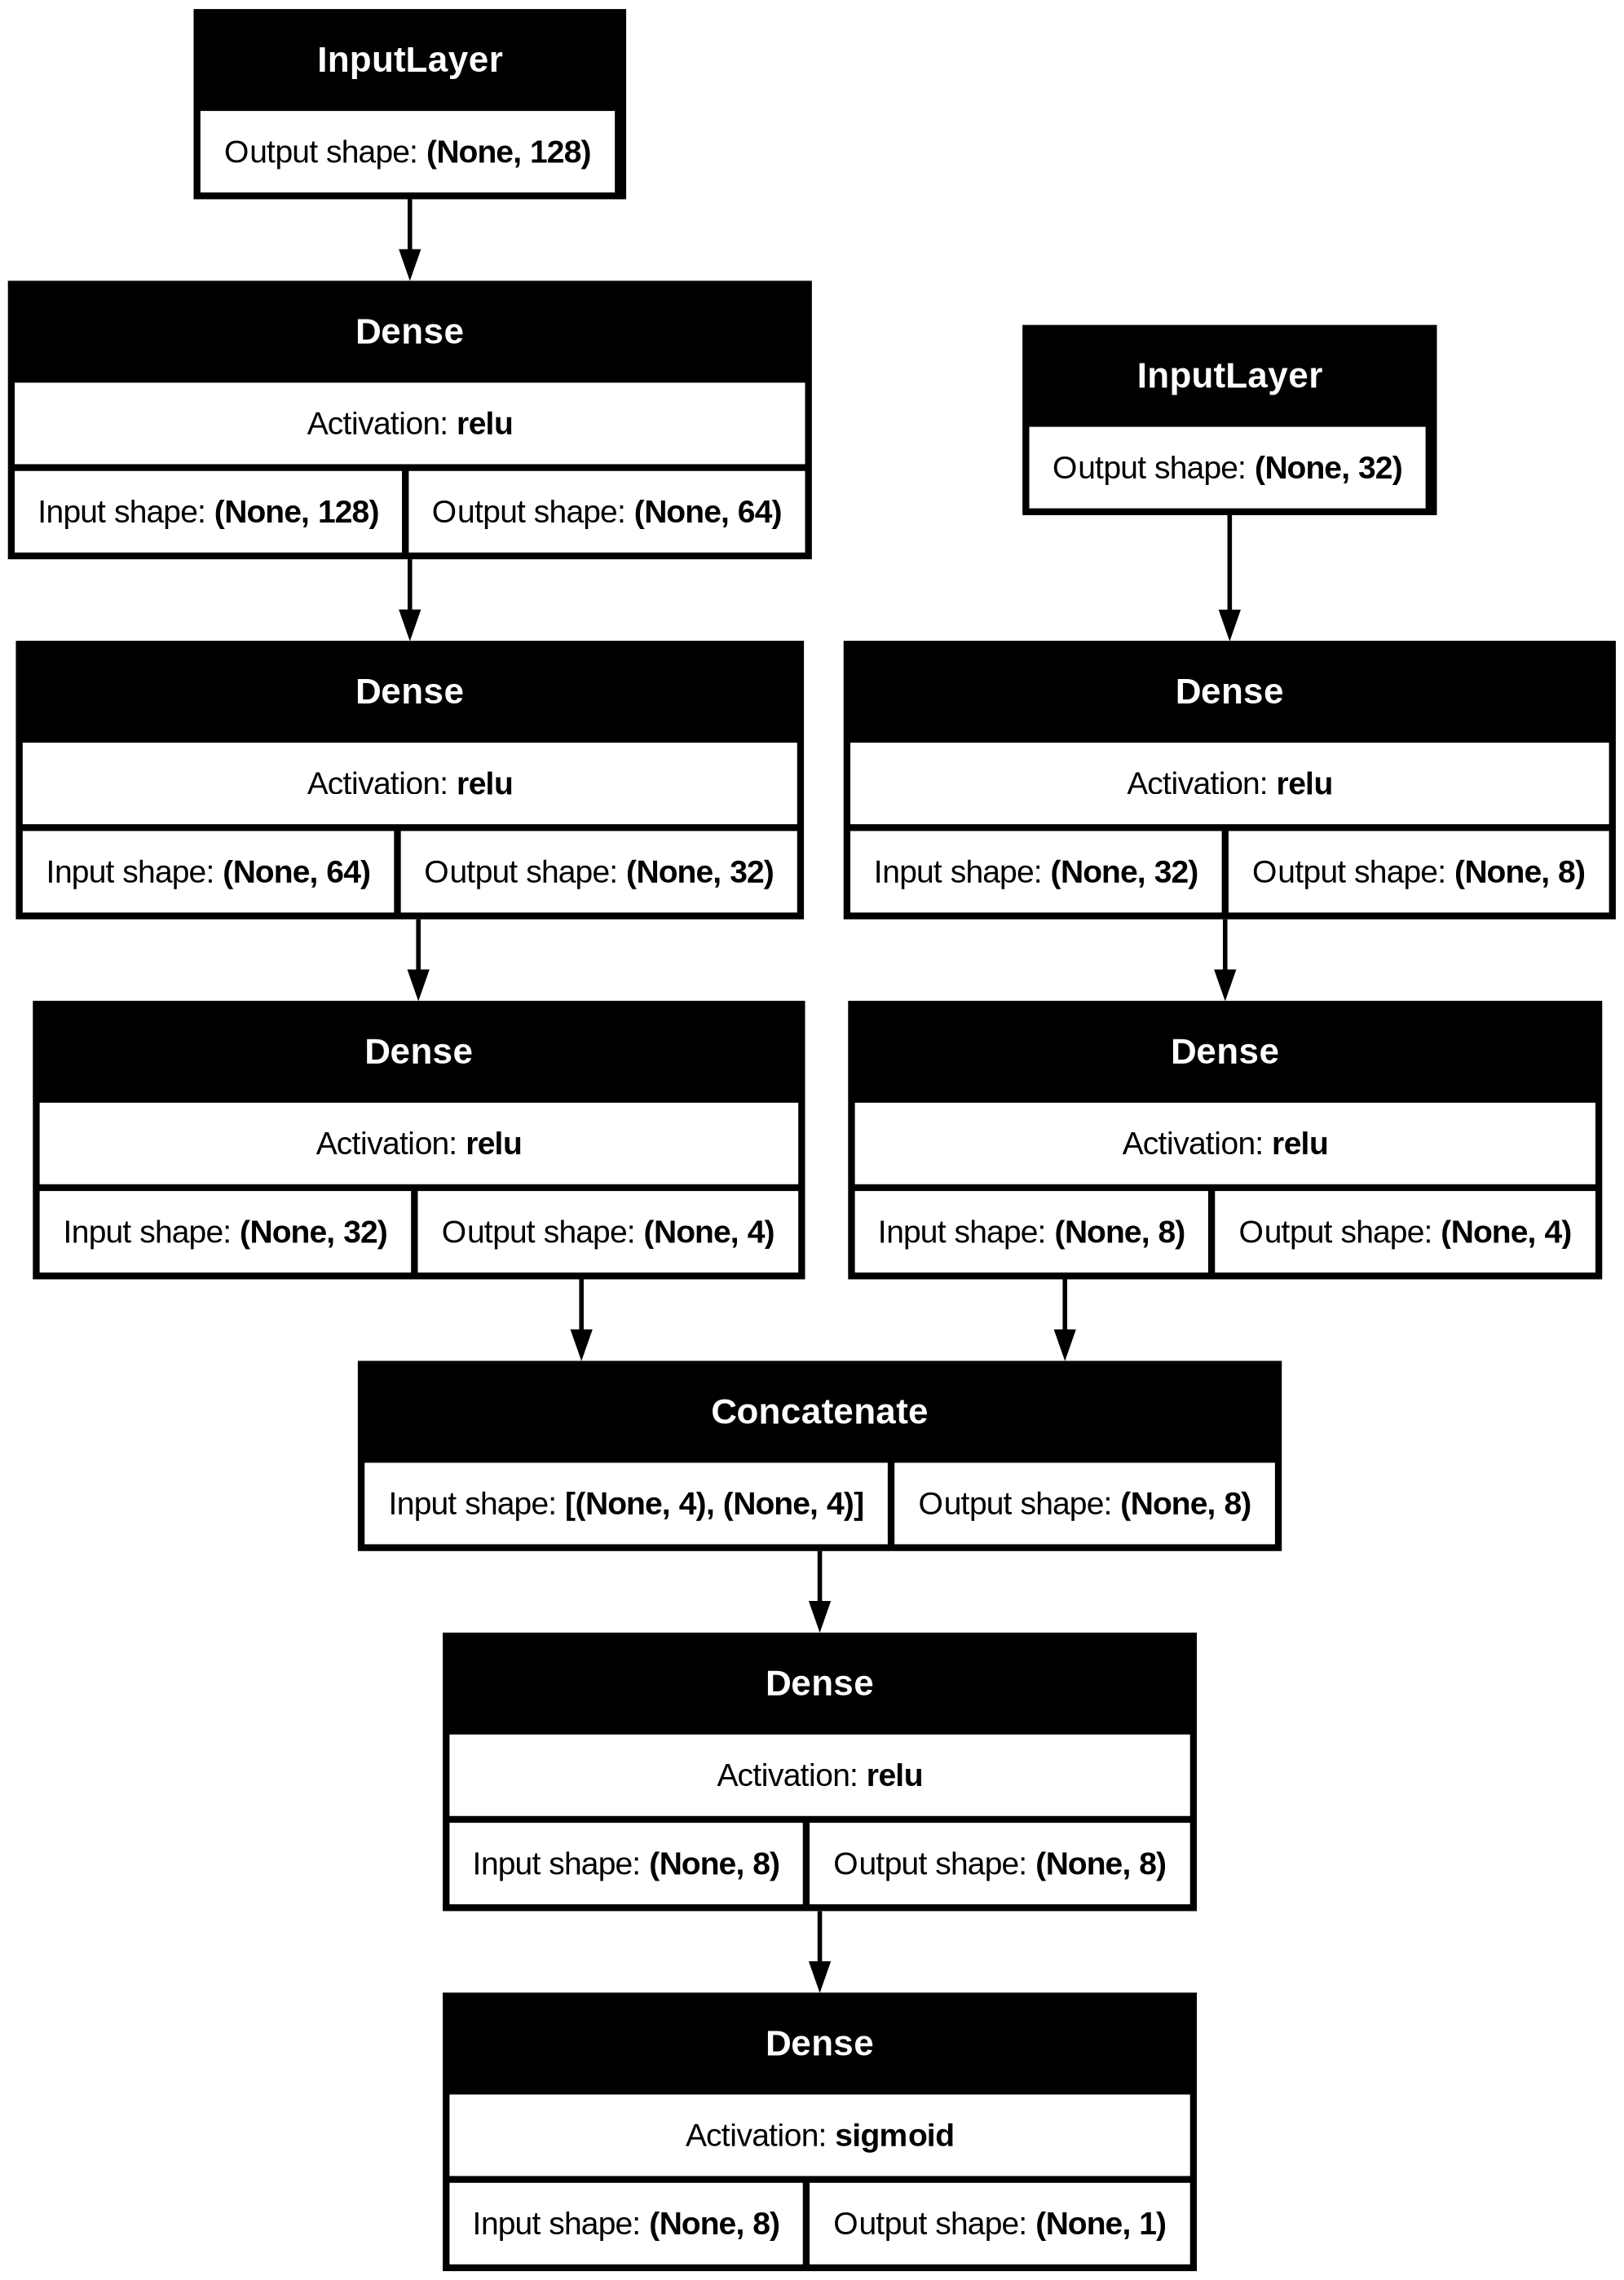

In [40]:
plot_model(model_2, show_layer_activations=True, show_shapes=True)